# Dataset Reference: 

## Original:
- http://lib.stat.cmu.edu/datasets/boston

## Updated:
- https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/datasets/_california_housing.py
- https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html


In [1]:
import numpy as np
import pandas as pd


In [2]:
# load california housing data
from sklearn.datasets import fetch_california_housing

# fetch the data and store it in a data frame
housing = fetch_california_housing()
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)

In [3]:
target = housing.target_names[0]
print(target)

# add the target variable to the data frame
df[target] = housing.target

# display the first few rows of the data frame
df.head()

MedHouseVal


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
# Independent variables
# - MedInc median income in block
# - HouseAge median house age in block
# - AveRooms average number of rooms
# - AveBedrms average number of bedrooms
# - Population block population
# - AveOccup average house occupancy
# - Latitude house block latitude
# - Longitude house block longitude

X = pd.DataFrame(np.c_[df['MedInc'], df['HouseAge'], df['AveRooms'], df['AveBedrms'], df['Population'],],
                 columns=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population'])

# Dependent variable
# - MedHouseVal median house value for California districts
y = df[target]

In [5]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [8]:
# Train a linear regression model
from sklearn.preprocessing import PolynomialFeatures

# Create a polynomial features object
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
print(poly_features.get_feature_names_out())

# Train a linear regression model
from sklearn.linear_model import LinearRegression

m = LinearRegression()
m.fit(X_train_poly, y_train)

# Test the model
X_test_poly = poly_features.transform(X_test)
y_pred = m.predict(X_test_poly)

# Evaluate the model (Round up to 4 decimal places)
print(f"R^2: {m.score(X_test_poly, y_test):.4f}")

['1' 'MedInc' 'HouseAge' 'AveRooms' 'AveBedrms' 'Population' 'MedInc^2'
 'MedInc HouseAge' 'MedInc AveRooms' 'MedInc AveBedrms'
 'MedInc Population' 'HouseAge^2' 'HouseAge AveRooms' 'HouseAge AveBedrms'
 'HouseAge Population' 'AveRooms^2' 'AveRooms AveBedrms'
 'AveRooms Population' 'AveBedrms^2' 'AveBedrms Population' 'Population^2']
R^2: 0.5854


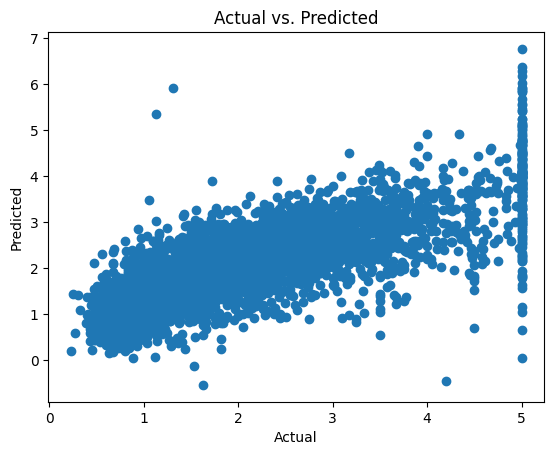

In [9]:
# Plot the results
import matplotlib.pyplot as plt

# Plot the predicted values against the actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()